In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
print(df.shape)

(32036, 2)


In [ ]:
df.head()

,review_description,rating
0,شركه زباله و سواقين بتبرشم و مفيش حتي رقم للشك...,-1
1,خدمة الدفع عن طريق الكي نت توقفت عندي اصبح فقط...,1
2,تطبيق غبي و جاري حذفه ، عاملين اكواد خصم و لما...,-1
3,فعلا تطبيق ممتاز بس لو فى امكانية يتيح لمستخدم...,1
4,سيء جدا ، اسعار رسوم التوصيل لا تمت للواقع ب ص...,-1


In [ ]:
# Check class balance in the dataset
# Count how many rows for each rating value
balance = df['rating'].value_counts()

# Show counts for each class
print(balance)

# Show percentage for each class
percent = df['rating'].value_counts(normalize=True) * 100
print(percent)


rating
 1    19189
-1    11340
 0     1507
Name: count, dtype: int64
rating
 1    59.898239
-1    35.397678
 0     4.704083
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df['review_description']   # Arabic text reviews
y = df['rating']               # labels: -1, 0, 1

# Stratified split: preserve the same class distribution in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 80% training - 20% testing
    random_state=42,        # reproducibility
    stratify=y              # keep same class distribution
)

# Combine back into DataFrames and reset index to start from 0
train_df = pd.DataFrame({'review_description': X_train, 'rating': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'review_description': X_test, 'rating': y_test}).reset_index(drop=True)

# Save CSV files
train_df.to_csv("train.csv", index=False, encoding='utf-8-sig')
test_df.to_csv("test.csv", index=False, encoding='utf-8-sig')

print("Train and Test CSV files have been saved successfully.")

# Print class distribution to check balance
print("Train class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True) * 100)


Train and Test CSV files have been saved successfully.
Train class distribution:
rating
 1    59.899329
-1    35.398783
 0     4.701889
Name: proportion, dtype: float64

Test class distribution:
rating
 1    59.893883
-1    35.393258
 0     4.712859
Name: proportion, dtype: float64


In [ ]:

# Save train DataFrame
train_df.to_csv("train.csv", index=False, encoding='utf-8-sig')

# Save test DataFrame
test_df.to_csv("test.csv", index=False, encoding='utf-8-sig')

print("Train and Test CSV files have been saved successfully.")


Train and Test CSV files have been saved successfully.


In [ ]:
df = train_df

In [ ]:
df.head()

,review_description,rating
0,البيستاشيو عشق لاااااااا ينتهي💚😍,1
1,محتاجين عربيات تشتغل معاكم ف المجال و لا,1
2,٥٦ه٥٦٧,1
3,توب,1
4,رائع ذو مصداقية,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25628 entries, 0 to 25627
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  25628 non-null  object
 1   rating              25628 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 400.6+ KB


In [ ]:
# Check nulls and datatypes
nulls_info = pd.DataFrame({
    "Null_Count": df.isnull().sum(),
    "DataType": df.dtypes
})

print(nulls_info)


                    Null_Count DataType
review_description           0   object
rating                       0    int64


In [ ]:
duplicates_count = df.duplicated().sum()
print("Total duplicate rows:", duplicates_count)

Total duplicate rows: 446


In [ ]:
df = df.drop_duplicates()

In [ ]:
import re

def extract_non_arabic(text):
    """
    Extract all characters that are NOT Arabic letters.
    """
    if not isinstance(text, str):
        return ""
    return ''.join(re.findall(r'[^\u0600-\u06FF]', text))

all_text = ''.join(df['review_description'].astype(str).tolist())
non_arabic_chars = set(extract_non_arabic(all_text))

print(non_arabic_chars)
print(f"\nTotal unique non-Arabic characters found: {len(non_arabic_chars)}")


{'新', 'ﻋ', '过', '😓', '🥫', '\u2069', '🍔', '€', '♍', '⇣', '🍡', '♠', 'F', '真', '🙎', '🏻', 'ހ', '😒', '💯', '段', 'ﻱ', '👦', 'ﻜ', '🙉', '站', '✋', '[', '🐼', '👍', '🍟', '正', '█', '👹', '根', '🍷', '行', '🤖', 'ﯙ', '😴', '🐱', '🤯', '🍤', 'S', '🥓', 'ﺸ', '管', '‘', '候', '小', '全', '🤙', '¡', '�', '❎', '○', '∩', '👀', '🏽', '﴾', '⁴', '<', '🌚', '🍩', '🏗', '😞', '🧤', 'd', '会', '©', '택', '查', '👐', '🥺', '@', '☆', '😦', '👉', '🥇', '&', '💀', '☎', '선', '🚿', '之', '起', '🥚', '◆', '🌸', '😯', '🎖', '🍙', 'ﺂ', '年', '🎎', 'U', '彻', 'ﻤ', 'ﺟ', 'e', '🍥', '可', '🇯', '😵', '🤟', '🇼', '本', '🐦', '💞', 'ﺤ', '😬', '😏', 'ﻛ', '由', '🇱', '😋', '🍜', '(', '👞', '😊', '⁷', '9', '🥩', 'ﺮ', '♡', '：', '🗣', 'ﻧ', '🍃', '也', 'ﻄ', '🌳', '与', '🥵', '🙋', '🚴', '⃢', '🖤', 'ﺒ', '£', '🚶', '🍐', '✅', '😌', '🔶', '的', 'u', '🍼', '🥰', '和', '×', '🤣', '✿', '央', '⚘', '♋', '🙆', '🇨', '¥', '个', '😗', '♂', '→', '꧁', '调', 'Ж', 'ş', 'ם', '╭', '😅', '↙', '前', '✈', '🛀', '🍗', '■', '¿', '☺', '☻', '😟', 'ﻌ', 'C', '🥶', '☠', 'р', '践', '~', '🇦', '🇧', '🍘', 'w', '😧', 'ﻹ', '🏕', '🎆', '来', '☔', '🇾', 'ﺧ', '切',

In [ ]:
# !pip install camel_tools

In [ ]:
# Install if not installed:
# pip install camel-tools

from camel_tools.utils import normalize

# Example: normalize Arabic text (fix alif, yaa, etc.)
df['review_description'] = df['review_description'].apply(lambda x: normalize.normalize_alef_maksura_ar(x))
df['review_description'] = df['review_description'].apply(lambda x: normalize.normalize_alef_ar(x))
df['review_description'] = df['review_description'].apply(lambda x: normalize.normalize_teh_marbuta_ar(x))

# Each function handles a specific variant:
# normalize_alef_maksura_ar → convert ى → ي
# normalize_alef_ar         → convert أ إ آ → ا
# normalize_teh_marbuta_ar  → convert ة → ه (اختياري)


/tmp/ipython-input-1761544997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(lambda x: normalize.normalize_alef_maksura_ar(x))
/tmp/ipython-input-1761544997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(lambda x: normalize.normalize_alef_ar(x))
/tmp/ipython-input-1761544997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
from camel_tools.utils.dediac import dediac_ar

# Remove diacritics automatically
df['review_description'] = df['review_description'].apply(lambda x: dediac_ar(x))


/tmp/ipython-input-3362528431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(lambda x: dediac_ar(x))


In [ ]:
# If not installed:
# pip install arabic-reshaper

# Simple digit map (auto usable)
digit_map = str.maketrans('0123456789', '٠١٢٣٤٥٦٧٨٩')

def convert_digits_to_arabic(text):
    """
    Convert ASCII (English) digits in a string to Arabic-Indic digits.
    Example: '123' -> '١٢٣'
    """
    if not isinstance(text, str):
        return text
    return text.translate(digit_map)


df['review_description'] = df['review_description'].apply(convert_digits_to_arabic)


/tmp/ipython-input-1761258372.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(convert_digits_to_arabic)


In [ ]:
# Install the emoji library if needed:
# pip install emoji

import emoji

def emojis_to_arabic(text: str) -> str:
    """
    Replace emojis with Arabic descriptions using emoji.demojize with Arabic language setting.
    """
    if not isinstance(text, str):
        return text
    # Convert emojis to text codes in Arabic
    return emoji.demojize(text, language='ar')

df['review_description'] = df['review_description'].apply(emojis_to_arabic)


/tmp/ipython-input-3887244778.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(emojis_to_arabic)


In [ ]:
df.head()

,review_description,rating
0,البيستاشيو عشق لاااااااا ينتهي:قلب_أخضر::وجه_م...,1
1,محتاجين عربيات تشتغل معاكم ف المجال و لا,1
2,٥٦ه٥٦٧,1
3,توب,1
4,رائع ذو مصداقيه,1


In [ ]:
import re

# Map for currency symbols
currency_map = {
    '€': ' يورو ',
    '¥': ' ين ',
    '₩': ' وون ',
    '﷼': ' ريال ',
    '$': ' دولار ',
    '£': ' جنيه ',
    '¢': ' سنت '
}

def replace_currencies(text):
    if not isinstance(text, str):
        return text
    for sym, name in currency_map.items():
        text = text.replace(sym, name)
    return text

# Step 1: Convert tokens like :قلب_أخضر: → " قلب أخضر "
def replace_emoji_tokens(text):
    if not isinstance(text, str):
        return text
    return re.sub(r':([^:]+):', lambda m: ' ' + m.group(1).replace('_', ' ') + ' ', text)

# Step 2: Remove thin spaces, newlines, punctuation (but KEEP normal spaces)
def remove_unwanted_chars(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'[\u200a\n.,!?؟]', '', text)

# Step 3: Keep only Arabic letters, Arabic digits, and spaces
def keep_only_arabic(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'[^\u0600-\u06FF٠-٩ ]', '', text)

# Combine all steps
def clean_arabic_text(text):
    text = replace_currencies(text)
    text = replace_emoji_tokens(text)   # expand emojis first with spaces
    text = remove_unwanted_chars(text)
    text = keep_only_arabic(text)
    text = re.sub(r'\s+', ' ', text).strip()  # normalize spaces
    return text

# Apply on the dataframe column
df['review_description'] = df['review_description'].apply(clean_arabic_text)


/tmp/ipython-input-195549443.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_description'] = df['review_description'].apply(clean_arabic_text)


In [ ]:
import re

def extract_non_arabic(text):
    """
    Extract all characters that are NOT Arabic letters.
    """
    if not isinstance(text, str):
        return ""
    return ''.join(re.findall(r'[^\u0600-\u06FF]', text))

all_text = ''.join(df['review_description'].astype(str).tolist())
non_arabic_chars = set(extract_non_arabic(all_text))

print(non_arabic_chars)
print(f"\nTotal unique non-Arabic characters found: {len(non_arabic_chars)}")


{' '}

Total unique non-Arabic characters found: 1


In [ ]:
df.head()

,review_description,rating
0,البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...,1
1,محتاجين عربيات تشتغل معاكم ف المجال و لا,1
2,٥٦ه٥٦٧,1
3,توب,1
4,رائع ذو مصداقيه,1


In [ ]:
# !!pip install camel-tools

In [ ]:
import requests
from camel_tools.tokenizers.word import simple_word_tokenize
import pandas as pd

url = 'https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt'
response = requests.get(url)
arabic_stopwords = set(response.text.splitlines())

def tokenize_remove_stopwords(text):
    tokens = simple_word_tokenize(text)
    tokens = [w for w in tokens if w not in arabic_stopwords]
    return tokens

df['tokens'] = df['review_description'].apply(tokenize_remove_stopwords)


df['cleaned_review'] = df['tokens'].apply(lambda x: ' '.join(x))

print(df[['review_description', 'cleaned_review']])


                                      review_description  \
0      البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...   
1               محتاجين عربيات تشتغل معاكم ف المجال و لا   
2                                                 ٥٦ه٥٦٧   
3                                                    توب   
4                                        رائع ذو مصداقيه   
...                                                  ...   
25623                          تطبيق بصراحه اسم ع الفاضي   
25624  الابلكيشن هذا ماله علاقه ب وجود المطاعم في نفس...   
25625                         جميييييل احسن من هنقرستيشن   
25626                                                 ٤٣   
25627                                     احسن من الزحمه   

                                          cleaned_review  
0      البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...  
1                      محتاجين عربيات تشتغل معاكم المجال  
2                                                 ٥٦ه٥٦٧  
3                                          

/tmp/ipython-input-1470135151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['review_description'].apply(tokenize_remove_stopwords)
/tmp/ipython-input-1470135151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['tokens'].apply(lambda x: ' '.join(x))


In [ ]:
df.head()

,review_description,rating,tokens,cleaned_review
0,البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...,1,"[البيستاشيو, عشق, لاااااااا, ينتهي, قلب, أخضر,...",البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...
1,محتاجين عربيات تشتغل معاكم ف المجال و لا,1,"[محتاجين, عربيات, تشتغل, معاكم, المجال]",محتاجين عربيات تشتغل معاكم المجال
2,٥٦ه٥٦٧,1,[٥٦ه٥٦٧],٥٦ه٥٦٧
3,توب,1,[توب],توب
4,رائع ذو مصداقيه,1,"[رائع, مصداقيه]",رائع مصداقيه


In [ ]:
# Show 5 random rows
df.sample(5)

,review_description,rating,tokens,cleaned_review
472,شركه زباله وتطبيق ازبل منها اتعلمو بقي من دول ...,-1,"[شركه, زباله, وتطبيق, ازبل, اتعلمو, بقي, دول, ...",شركه زباله وتطبيق ازبل اتعلمو بقي دول الخليج ع...
13375,تطبيق ممتاز اسعار ممتازه لا غني عنه المهم دعم ...,1,"[تطبيق, ممتاز, اسعار, ممتازه, غني, المهم, دعم,...",تطبيق ممتاز اسعار ممتازه غني المهم دعم التوصيل...
6237,انا طلبت ٧ بيتزا وجاني في ١٠ دقائق ماشاءالله,1,"[انا, طلبت, ٧, بيتزا, وجاني, ١٠, دقائق, ماشاءا...",انا طلبت ٧ بيتزا وجاني ١٠ دقائق ماشاءالله
15,كدابين,-1,[كدابين],كدابين
2611,التطبيق حلو لكن الطلب يتاخر كثير واكثر من مره ...,0,"[التطبيق, حلو, الطلب, يتاخر, كثير, واكثر, مره,...",التطبيق حلو الطلب يتاخر كثير واكثر مره اطلب وي...


In [ ]:
import camel_tools
print(camel_tools.__version__)


1.5.6


In [ ]:
import inspect
import camel_tools.morphology.analyzer as analyzer

print(dir(analyzer))


if hasattr(analyzer, "Analyzer"):
    print(inspect.getsource(analyzer.Analyzer))


['AR_CHARSET', 'AR_DIAC_CHARSET', 'AnalyzedWord', 'Analyzer', 'AnalyzerError', 'CharMapper', 'DEFAULT_NORMALIZE_MAP', 'LFUCache', 'MorphologyDB', 'RLock', 'UNICODE_PUNCT_SYMBOL_CHARSET', '_ALL_PUNC', '_BACKOFF_TYPES', '_COPY_FEATS', '_DIAC_RE', '_HAS_PUNC_RE', '_IS_AR_RE', '_IS_DIGIT_RE', '_IS_PUNC_RE', '_IS_STRICT_DIGIT_RE', '_NOAN_RE', '_UNDEFINED_LEX_FEATS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_has_punc', '_is_ar', '_is_digit', '_is_punc', '_is_strict_digit', '_segments_gen', 'absolute_import', 'cached', 'copy', 'dediac_ar', 'deque', 'itertools', 'merge_features', 'namedtuple', 're', 'simple_ar_to_caphi']
class Analyzer:
    """Morphological analyzer component.

    Args:
        db (:obj:`~camel_tools.morphology.database.MorphologyDB`): Database to
            use for analysis. Must be opened in analysis or reinflection mode.
        backoff (:obj:`str`, optional): Backoff mode. Can be one of the
            fol

In [ ]:
# !pip install camel-tools
!camel_data -i all


The following packages will be installed: 'morphology-db-egy-r13', 'disambig-ranking-cache-calima-glf-01', 'disambig-bert-unfactored-egy', 'disambig-bert-unfactored-glf', 'dialectid-model26', 'disambig-mle-calima-egy-r13', 'ner-arabert', 'morphology-db-lev-01', 'disambig-bert-unfactored-msa', 'disambig-ranking-cache-calima-lev-01', 'sentiment-analysis-arabert', 'disambig-ranking-cache-calima-egy-r13', 'morphology-db-msa-s31', 'disambig-bert-unfactored-lev', 'dialectid-model6', 'morphology-db-glf-01', 'disambig-mle-calima-msa-r13', 'morphology-db-msa-r13', 'sentiment-analysis-mbert', 'disambig-ranking-cache-calima-msa-r13'
Extracting package 'morphology-db-egy-r13': 100% 67.3M/67.3M [00:00<00:00, 449MB/s]
Extracting package 'disambig-ranking-cache-calima-glf-01': 100% 28.7M/28.7M [00:00<00:00, 406MB/s]
Extracting package 'disambig-bert-unfactored-egy': 100% 446M/446M [00:01<00:00, 353MB/s]
Extracting package 'disambig-bert-unfactored-glf': 100% 442M/442M [00:02<00:00, 210MB/s]
Extractin

In [ ]:
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer
from camel_tools.tokenizers.word import simple_word_tokenize

# Load the standard Arabic morphology database
db = MorphologyDB.builtin_db()
analyzer = Analyzer(db)

def lemmatize_arabic(text):
    tokens = simple_word_tokenize(text)
    lemmas = []
    for token in tokens:
        analyses = analyzer.analyze(token)
        if analyses:
            # تحقق إذا مفتاح 'lemma' موجود
            lemma = analyses[0].get('lemma', token)
            lemmas.append(lemma)
        else:
            lemmas.append(token)
    return ' '.join(lemmas)

# Apply lemmatization on the column
df['lemmatized'] = df['cleaned_review'].apply(lemmatize_arabic)

print(df[['cleaned_review', 'lemmatized']].head())


                                      cleaned_review  \
0  البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...   
1                  محتاجين عربيات تشتغل معاكم المجال   
2                                             ٥٦ه٥٦٧   
3                                                توب   
4                                       رائع مصداقيه   

                                          lemmatized  
0  البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...  
1                  محتاجين عربيات تشتغل معاكم المجال  
2                                             ٥٦ه٥٦٧  
3                                                توب  
4                                       رائع مصداقيه  


/tmp/ipython-input-1689638353.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = df['cleaned_review'].apply(lemmatize_arabic)


In [ ]:
df.sample(5)

,review_description,rating,tokens,cleaned_review,lemmatized
24735,برنامج فاشل ما بفتح,-1,"[برنامج, فاشل, بفتح]",برنامج فاشل بفتح,برنامج فاشل بفتح
22315,سئ جدااااا افشل شركه ولا انصح احد بشركه وي,-1,"[سئ, جدااااا, افشل, شركه, انصح, بشركه, وي]",سئ جدااااا افشل شركه انصح بشركه وي,سئ جدااااا افشل شركه انصح بشركه وي
9409,ممتاز خدمه ممتازه توفر جهد علي المواطن والازدح...,1,"[ممتاز, خدمه, ممتازه, توفر, جهد, المواطن, والا...",ممتاز خدمه ممتازه توفر جهد المواطن والازدحامات,ممتاز خدمه ممتازه توفر جهد المواطن والازدحامات
161,اسوء شركه سواء دليفري او خدمه عملاء او مديرين ...,-1,"[اسوء, شركه, سواء, دليفري, خدمه, عملاء, مديرين...",اسوء شركه سواء دليفري خدمه عملاء مديرين منتهي ...,اسوء شركه سواء دليفري خدمه عملاء مديرين منتهي ...
4007,التطبيق جميل,1,"[التطبيق, جميل]",التطبيق جميل,التطبيق جميل


In [ ]:
# Check class balance in the dataset
# Count how many rows for each rating value
balance = df['rating'].value_counts()

# Show counts for each class
print(balance)

# Show percentage for each class
percent = df['rating'].value_counts(normalize=True) * 100
print(percent)


rating
 1    15013
-1     8967
 0     1202
Name: count, dtype: int64
rating
 1    59.617981
-1    35.608768
 0     4.773251
Name: proportion, dtype: float64


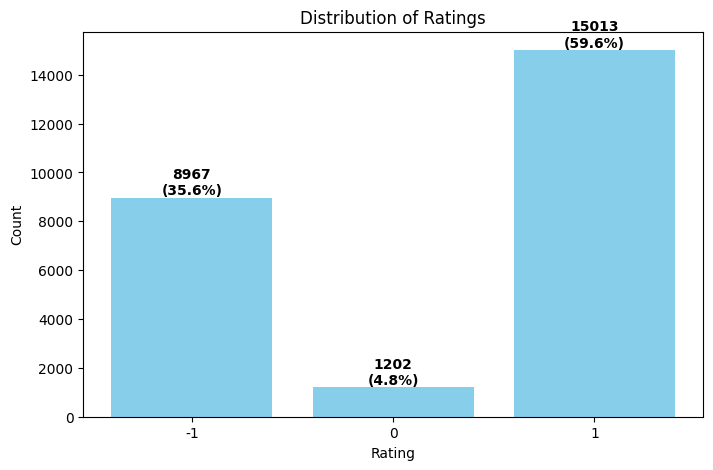

In [ ]:
import matplotlib.pyplot as plt

# Count rows per class
counts = df['rating'].value_counts().sort_index()
percent = df['rating'].value_counts(normalize=True).sort_index() * 100

# Plot
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(counts.index.astype(str), counts.values, color='skyblue')

# Add text for count and percentage on top of bars
for bar, pct in zip(bars, percent.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

ax.set_title('Distribution of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()


In [ ]:
df = df[["rating", "lemmatized"]]

In [ ]:
df.sample(5)

,rating,lemmatized
17678,1,شكرا طلبات يد مرفوعة بأصابع متفرقة
4697,-1,تطبيق فاشل الاسكندريه يعني منطقه زي جليم مش بي...
19591,0,لاسف الشديد البطئ والوقوف المحطات هيفقدوكم اهم...
23424,1,روعيييييي
2759,-1,تطبيق زباله ومعقد ومش فاهم خواتو اشي


In [ ]:
rows_with_empty = df[(df == '').any(axis=1)]
print(rows_with_empty)



       rating lemmatized
11          1           
39          1           
48          1           
53          1           
180         1           
...       ...        ...
25569       0           
25576       1           
25578       1           
25607       1           
25616       1           

[640 rows x 2 columns]


In [ ]:
# from transformers import pipeline
# import pandas as pd

# # تحميل BLOOMZ (يدعم العربي)
# generator = pipeline("text-generation", model="bigscience/bloomz-560m")

# def generate_sentence_with_model(label):
#     if label == -1:
#         prompt = "اكتب جملة تعبر عن تجربة سيئة وسلبية:"
#     elif label == 0:
#         prompt = "اكتب جملة تعبر عن تجربة عادية ومحايدة:"
#     elif label == 1:
#         prompt = "اكتب جملة تعبر عن تجربة إيجابية وجميلة:"
#     else:
#         prompt = "اكتب جملة باللغة العربية:"

#     output = generator(prompt, max_length=30, num_return_sequences=1, do_sample=True)
#     return output[0]["generated_text"].replace(prompt, "").strip()

# # # تعويض النصوص الفارغة
# # def fill_with_model(df):
# #     for idx, row in df.iterrows():
# #         if row["lemmatized"] == "" or pd.isna(row["lemmatized"]):
# #             df.at[idx, "lemmatized"] = generate_sentence_with_model(row["rating"])
# #     return df

# # # تطبيق الدالة
# # df = fill_with_model(df)
# generate_sentence_with_model(1)

In [ ]:
# Check nulls and datatypes
nulls_info = pd.DataFrame({
    "Null_Count": df.isnull().sum(),
    "DataType": df.dtypes
})

print(nulls_info)


            Null_Count DataType
rating               0    int64
lemmatized           0   object


In [ ]:

df = df[df["lemmatized"].str.strip() != ""]

# نتأكد إن rating لسه موجود
print(df.columns)
print(df.head())


Index(['rating', 'lemmatized'], dtype='object')
   rating                                         lemmatized
0       1  البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...
1       1                  محتاجين عربيات تشتغل معاكم المجال
2       1                                             ٥٦ه٥٦٧
3       1                                                توب
4       1                                       رائع مصداقيه


In [ ]:
rows_with_empty = df[(df == '').any(axis=1)]
print(rows_with_empty)



Empty DataFrame
Columns: [rating, lemmatized]
Index: []


In [ ]:

df['sentence_length'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

print(df['sentence_length'].describe())


count    24542.000000
mean         8.749857
std         14.108504
min          1.000000
25%          3.000000
50%          5.000000
75%         10.000000
max        567.000000
Name: sentence_length, dtype: float64


In [ ]:

total_sentences = len(df)


short_sentences = (df["sentence_length"] <= 64).sum()


percentage = (short_sentences / total_sentences) * 100

print(f"Total sentences: {total_sentences}")
print(f"Sentences <= 64 words: {short_sentences}")
print(f"Percentage: {percentage:.2f}%")


Total sentences: 24542
Sentences <= 64 words: 24385
Percentage: 99.36%


In [ ]:

df_filtered = df[df["sentence_length"] <= 64].copy()

print("البيانات بعد التصفية:")
print("إجمالي الجمل:", len(df_filtered))
print("توزيع التصنيفات:\n", df_filtered["rating"].value_counts())

df_filtered.head()


البيانات بعد التصفية:
إجمالي الجمل: 24385
توزيع التصنيفات:
 rating
 1    14463
-1     8745
 0     1177
Name: count, dtype: int64


,rating,lemmatized,sentence_length
0,1,البيستاشيو عشق لاااااااا ينتهي قلب أخضر وجه مب...,11
1,1,محتاجين عربيات تشتغل معاكم المجال,5
2,1,٥٦ه٥٦٧,1
3,1,توب,1
4,1,رائع مصداقيه,2


In [ ]:
from sklearn.utils import resample
import pandas as pd

# تقسيم البيانات
df_pos = df_filtered[df_filtered["rating"] == 1]
df_neg = df_filtered[df_filtered["rating"] == -1]
df_neu = df_filtered[df_filtered["rating"] == 0]

# حجم الفئة الموجبة (نخليه زي ما هو)
pos_count = len(df_pos)

# إجمالي الهدف (الفئة 1 تمثل 40%)
total_target = int(pos_count / 0.40)

# الأهداف لكل فئة
target_pos = pos_count                # نفس العدد
target_neg = int(total_target * 0.40) # 40%
target_neu = int(total_target * 0.20) # 20%

print("Targets:", target_pos, target_neg, target_neu)

# Oversampling للفئات الناقصة
df_neg_res = resample(df_neg,
                      replace=True,
                      n_samples=target_neg,
                      random_state=42)

df_neu_res = resample(df_neu,
                      replace=True,
                      n_samples=target_neu,
                      random_state=42)

# دمج
df_balanced = pd.concat([df_pos, df_neg_res, df_neu_res])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# التوزيع الجديد
print(df_balanced["rating"].value_counts(normalize=True) * 100)
print(df_balanced["rating"].value_counts())


Targets: 14463 14462 7231
rating
 1    40.001659
-1    39.998894
 0    19.999447
Name: proportion, dtype: float64
rating
 1    14463
-1    14462
 0     7231
Name: count, dtype: int64


In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel


tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv2")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(64000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_embeddings_batch(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        #
        inputs = tokenizer(batch_texts, return_tensors="pt",
                           truncation=True, padding=True, max_length=64)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # CLS token
            all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)


In [ ]:

texts = df_filtered["lemmatized"].tolist()

embeddings = get_embeddings_batch(texts, batch_size=64)

# np.save("X_embeddings.npy", embeddings)
# np.save("y_labels.npy", df_filtered["rating"].values)

# print("✅ Done! Embeddings saved. Shape:", embeddings.shape)


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


X = np.array(embeddings)
y_map = {-1: 0, 0: 1, 1: 2}
y = df_filtered["rating"].map(y_map).values

if len(X.shape) == 2:
    X = np.expand_dims(X, axis=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='accuracy',
    patience=4,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

history = model_rnn.fit(
    X, y,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

loss, accuracy = model_rnn.evaluate(X, y, verbose=0)
accuracy_percent = accuracy * 100
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy_percent:.2f}%")

predictions = model_rnn.predict(X)
pred_classes = np.argmax(predictions, axis=1)
print("First 5 predictions:", pred_classes[:5])


Epoch 1/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7574 - loss: 0.6142
Epoch 2/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8009 - loss: 0.5250
Epoch 3/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8050 - loss: 0.5211
Epoch 4/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8008 - loss: 0.5147
Epoch 5/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8035 - loss: 0.5106
Epoch 6/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.4890
Epoch 7/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8058 - loss: 0.4975
Epoch 8/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8153 - loss: 0.4847
Epoch 9/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8060 - loss: 0.5008
Epoch 10/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8136 - loss: 0.4740
Epoch 11/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8117 - loss: 0.4769
Epoch 12/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

In [ ]:
loss, accuracy = model_rnn.evaluate(X, y, verbose=0)
accuracy_percent = accuracy * 100
print(f"Train Accuracy: {accuracy_percent:.2f}%")


Train Accuracy: 89.95%


In [ ]:

model_rnn.save("rnn_classification_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))  # 3 فئات

# Compile
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=4,
    verbose=1,
    mode='max',
    restore_best_weights=True
)


history = model_lstm.fit(
    X, y,
    epochs=60,
    batch_size=32,
    callbacks=[early_stop]
)


loss, accuracy = model_lstm.evaluate(X, y, verbose=0)
accuracy_percent = accuracy * 100
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy_percent:.2f}%")




model_lstm.save("lstm_classification_model.h5")
print("Model saved successfully!")

Epoch 1/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7522 - loss: 0.6042
Epoch 2/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7978 - loss: 0.5154
Epoch 3/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8050 - loss: 0.5026
Epoch 4/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8158 - loss: 0.4773
Epoch 5/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8150 - loss: 0.4767
Epoch 6/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8231 - loss: 0.4621
Epoch 7/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8190 - loss: 0.4666
Epoch 8/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8256 - loss: 0.4543
Epoch 9/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8333 - loss: 0.4361
Epoch 10/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8341 - loss: 0.4313
Epoch 11/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8355 - loss: 0.4254
Epoch 12/60
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

Train Loss: 0.0549
Train Accuracy: 98.41%
Model saved successfully!
